# Fruits Pediction


In [8]:
%%bash
ls

sample_data


In [15]:
%%bash
mv train_zip/train ./

In [26]:
# Imports

# for garbage collection
import gc

import pickle

import cv2

import os
from xml.etree.ElementTree import parse
import numpy as np 
import pandas as pd 
import random, shutil
from scipy import io
import more_itertools

# training
import tensorflow as tf
tf.test.gpu_device_name()
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, 
    Conv2D, 
    MaxPooling2D, 
    Dropout, 
    Flatten, 
    MaxPool2D
)
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import (
    Activation, 
    Convolution2D, 
    Dropout, 
    Conv2D, 
    AveragePooling2D, 
    BatchNormalization, 
    Flatten, 
    GlobalAveragePooling2D
)
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import (
    ModelCheckpoint, 
    ReduceLROnPlateau
)

from sklearn.preprocessing import LabelEncoder

# plotting
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
%matplotlib inline

In [44]:
!unzip /content/drive/MyDrive/test_zip.zip

mv: cannot stat 'test_zip/test': No such file or directory


In [7]:
!unzip /content/drive/MyDrive/train_zip.zip

unzip:  cannot find or open /content/drive/MyDrive/train_zip.zip, /content/drive/MyDrive/train_zip.zip.zip or /content/drive/MyDrive/train_zip.zip.ZIP.


In [17]:
TEST_DIR = "test/"
TRAIN_DIR = "train/"
MODELS = "Models/"

EPOCHS = 120
LEARNING_RATE = 0.001
BATCH_SIZE = 128

L2_REG = 0.001

In [ ]:
train_images = []
train_labels = []

for filename in os.listdir(TRAIN_DIR):
    if filename.split('.')[1] == 'jpg':
        train_images.append(filename)
        label = filename.split('_',1)[0]
        train_labels.append(label)

In [ ]:
print(len(train_images), len(train_labels))

240 240


In [ ]:
print(len(train_labels))
dict(zip(train_labels,
     [train_labels.count(fruit) for fruit in train_labels]
     ))

240


{'apple': 75, 'banana': 73, 'mixed': 20, 'orange': 72}

In [ ]:
print(len(test_labels))
dict(zip(test_labels,
     [test_labels.count(fruit) for fruit in test_labels]
     ))

60


{'apple': 19, 'banana': 18, 'mixed': 5, 'orange': 18}

In [ ]:
def show_dir_images(img_dir, img_names, n_to_show):
    """
    Takes a path to an images directory representing one dog breed and the number of images to show from this directory.
    
    Args:
        breed: a path to an images directory representing one dog breed.
        n_to_show: the number of images to show from the breed directory.
    """
    plt.figure(figsize=(16,16))
    path_to_image_dir = f"{img_dir}"
    images = os.listdir(path_to_image_dir)[:n_to_show]
    for i in range(n_to_show):
        if images[i] in img_names:
            img = mpimg.imread(path_to_breed_dir + images[i])
            plt.subplot(n_to_show/4+1, 4, i+1)
            plt.imshow(img)
            plt.axis('off')

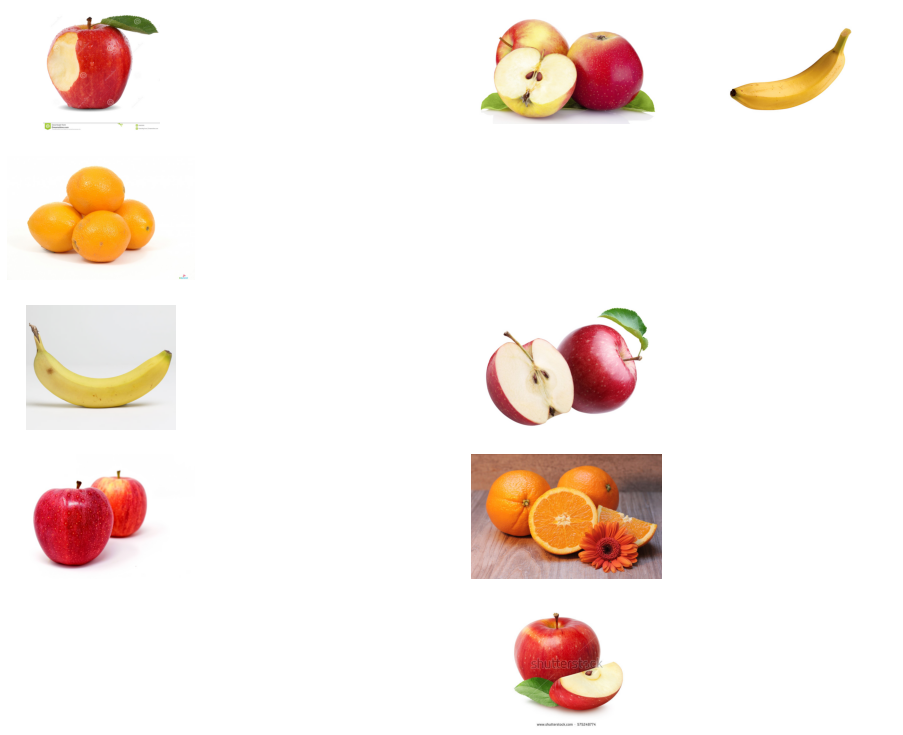

In [ ]:
show_dir_images(TRAIN_DIR, train_images, 20)

In [ ]:
train_images.sort()

In [ ]:
train_annotations.sort()

In [ ]:
object_xmin=[]
object_ymin=[]
object_xmax=[]
object_ymax=[]

for i in range(len(train_annotations)):
    root_=parse(TRAIN_DIR+train_annotations[i])
    root=root_.getroot()
    objects = root.findall("object")
    object_xmin.append([int(x.find("bndbox").findtext("xmin")) for x in objects])
    object_ymin.append([int(x.find("bndbox").findtext("ymin")) for x in objects])
    object_xmax.append([int(x.find("bndbox").findtext("xmax")) for x in objects])
    object_ymax.append([int(x.find("bndbox").findtext("ymax")) for x in objects])

In [ ]:
print(object_xmin)

[[8], [56], [213, 1, 116], [43], [415, 105, 194], [318], [643], [14], [113], [144], [158], [37], [23], [97, 314], [136], [147, 99, 235], [110, 1, 104], [167], [125], [51], [25], [43], [584, 492, 176, 367, 642], [254, 217, 603, 468, 1], [304, 3], [553], [91], [43], [8], [36], [38], [196], [141, 18], [202], [144], [39], [204], [21], [34, 304], [515, 339, 10, 193, 442, 301, 535], [54, 446, 683], [133, 401], [15], [68, 208, 264, 331, 420, 324], [147, 46, 86], [43], [129, 219, 182, 1, 309, 377, 402, 395], [45], [87], [41, 118, 223], [349], [146], [167, 1], [290], [139, 559, 252, 699], [114, 282, 57, 481], [234], [97], [19], [344], [70, 35, 183, 605, 498, 333, 191, 443], [46, 363], [291], [397, 78], [95, 229, 169], [287], [31], [319, 79], [26], [6], [125, 197], [5], [36], [67], [184], [89], [87, 94, 117, 520], [69], [64, 71, 80, 203], [60], [24, 100], [25], [114, 328, 360, 232], [301], [78, 171, 158, 190], [174, 322, 116], [317, 48, 81], [1], [103], [26], [129], [645, 819, 101], [41], [103],

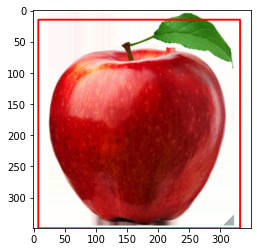

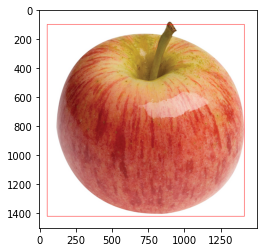

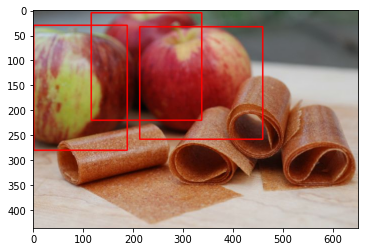

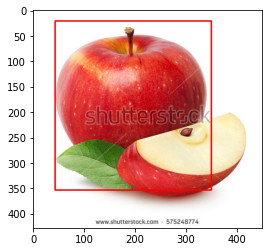

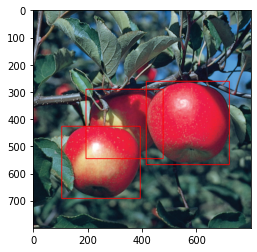

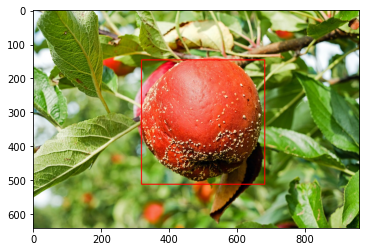

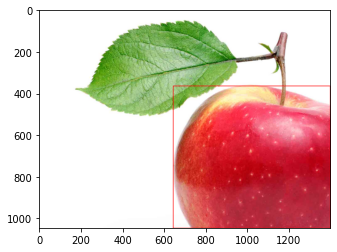

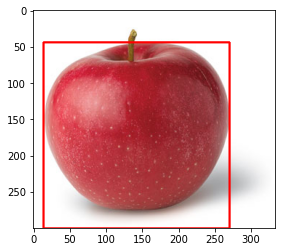

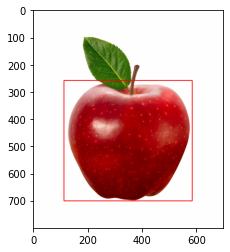

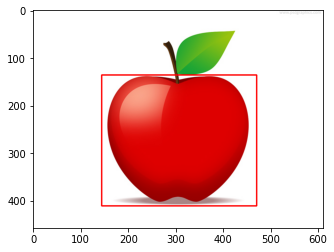

In [ ]:
for i in range(len(train_images[:10])):
    img = cv2.imread(TRAIN_DIR+train_images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for j in range(len(object_xmin[i])):
        output=cv2.rectangle(img,(object_xmin[i][j],object_ymin[i][j]),(object_xmax[i][j],object_ymax[i][j]),(255,0,0),2)
    plt.imshow(output)
    plt.show()

In [89]:
# create train features
train_features = []
train_labels = []

for filename in os.listdir(TRAIN_DIR):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(TRAIN_DIR,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ary=Image.fromarray(img,'RGB')
        r=ary.resize((50,50))
        train_labels.append(filename.split('_')[0])
        train_features.append(np.array(r))

In [19]:
train_features = np.array(train_features)

In [20]:
# train labels (encoding)
la = LabelEncoder()
labels = pd.DataFrame(train_labels)

In [21]:
train_labels_encoded = la.fit_transform(labels[0])

In [22]:
train_labels_encoded

array([3, 1, 1, 3, 0, 1, 1, 0, 1, 1, 1, 3, 3, 3, 3, 1, 3, 2, 1, 1, 1, 0,
       1, 0, 3, 3, 1, 1, 0, 2, 1, 1, 1, 2, 0, 3, 0, 3, 2, 3, 1, 0, 0, 1,
       0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 2, 3, 3, 0, 0, 3, 1, 3, 2, 3, 1, 0,
       0, 1, 0, 3, 1, 3, 1, 0, 3, 0, 3, 0, 0, 1, 3, 0, 3, 1, 0, 2, 0, 3,
       0, 1, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 3, 0, 2, 3, 1, 0, 0,
       0, 1, 3, 3, 3, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 3, 3, 0, 0, 3,
       2, 1, 0, 0, 3, 3, 1, 3, 0, 1, 1, 0, 3, 1, 1, 1, 0, 3, 0, 1, 0, 0,
       3, 1, 1, 0, 1, 1, 0, 3, 0, 3, 1, 3, 0, 3, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 2, 0, 3, 0, 1, 3, 2, 1, 3, 1, 2, 1, 0, 3, 3, 2, 0, 1, 3, 1, 1,
       0, 1, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 0, 1, 3, 3, 3, 1, 3, 3, 3, 2,
       3, 3, 1, 0, 1, 1, 2, 3, 3, 3, 1, 1, 3, 3, 0, 1, 3, 1, 3, 3])

In [90]:
# saving
np.save("train_features.npy", train_features)
np.save("train_labels.npy", train_labels)

In [27]:
# train data shuffling
s = np.arange(train_features.shape[0])
np.random.shuffle(s)

train_features = train_features[s]
train_labels = train_labels_encoded[s]

In [28]:
num_classes = len(np.unique(train_labels))
len_data = len(train_features)

In [29]:
X_train, X_test = train_features[(int)(0.1 * len_data):], train_features[:(int)(0.1 * len_data)]

In [30]:
y_train, y_test = train_labels[(int)(0.1*len_data):], train_labels[:(int)(0.1*len_data)]

In [31]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()

model.add(Conv2D(256, kernel_size=5, strides=3, padding='same', activation='relu', input_shape=(50, 50, 3)))
# model.add(AveragePooling2D(pool_size=(3,3),strides=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128, kernel_size=4, strides=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1000,input_shape=(50, 50, 3), activation="relu"))
model.add(Dropout(0.4))
model.add(BatchNormalization())
#output layer
model.add(Dense(4, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 17, 17, 256)       19456     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 128)         524416    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 2, 64)          73792     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 1, 64)         

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(LEARNING_RATE), 
              metrics=['accuracy'])

history = model.fit(X_train, 
                  y_train, 
                  batch_size=BATCH_SIZE, 
                  epochs=EPOCHS, 
                  verbose=1,
                  validation_split=0.33,
                  callbacks=[checkpoint])

Epoch 1/120
2/2 [==============================] - 2s 371ms/step - loss: 2.1150 - accuracy: 0.1947 - val_loss: 12.4082 - val_accuracy: 0.2778

Epoch 00001: loss did not improve from 0.00266
Epoch 2/120
2/2 [==============================] - 1s 164ms/step - loss: 1.5044 - accuracy: 0.4442 - val_loss: 7.6162 - val_accuracy: 0.2778

Epoch 00002: loss did not improve from 0.00266
Epoch 3/120
2/2 [==============================] - 1s 147ms/step - loss: 0.8025 - accuracy: 0.7619 - val_loss: 7.4257 - val_accuracy: 0.2917

Epoch 00003: loss did not improve from 0.00266
Epoch 4/120
2/2 [==============================] - 1s 153ms/step - loss: 0.7858 - accuracy: 0.7315 - val_loss: 9.1656 - val_accuracy: 0.2639

Epoch 00004: loss did not improve from 0.00266
Epoch 5/120
2/2 [==============================] - 1s 147ms/step - loss: 0.7373 - accuracy: 0.7263 - val_loss: 6.7023 - val_accuracy: 0.3333

Epoch 00005: loss did not improve from 0.00266
Epoch 6/120
2/2 [==============================] - 1s 

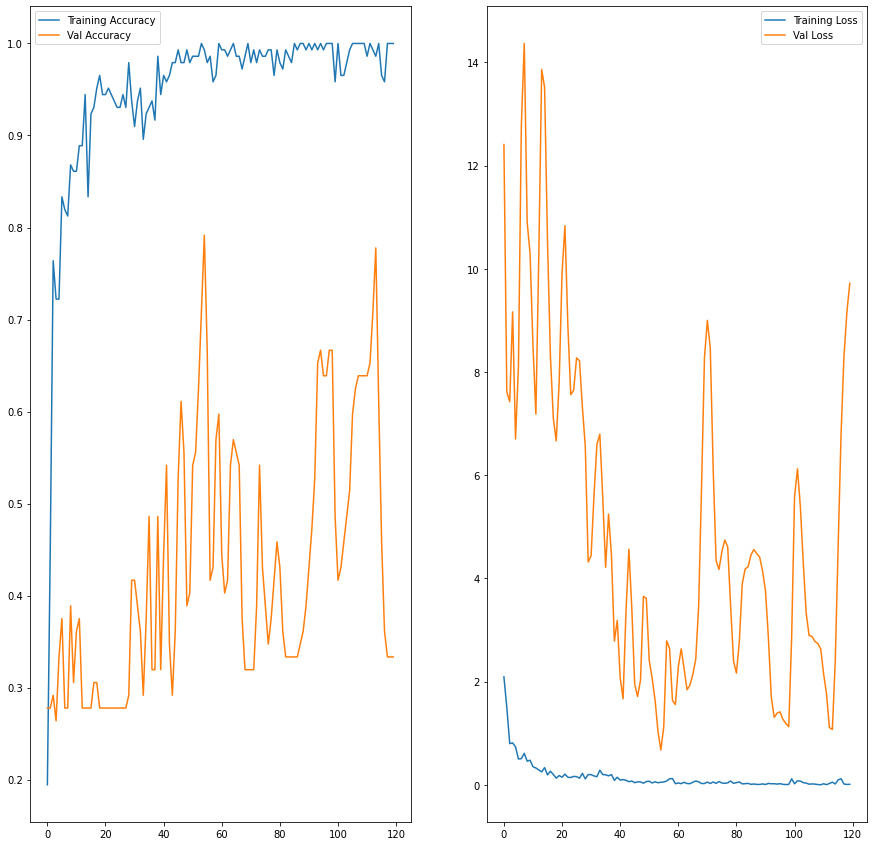

In [ ]:
figure=plt.figure(figsize=(15,15))
ax=figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx=figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 36ms/step - loss: 11.1160 - accuracy: 0.2500


[11.115962028503418, 0.25]

In [32]:
https://keras.io/api/layers/regularizers/
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=(50, 50, 3), activation='relu',kernel_regularizer=l2(L2_REG)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu',kernel_regularizer=l2(L2_REG)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(2,2), activation='relu',kernel_regularizer=l2(L2_REG)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(LEARNING_RATE), 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 128)         0

In [33]:
model_filepath = os.path.join(MODELS, "weights.h5")

In [34]:
checkpoint = ModelCheckpoint(model_filepath, 
                             monitor='loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

In [35]:
history = model.fit(X_train, 
                  y_train, 
                  batch_size=BATCH_SIZE, 
                  epochs=EPOCHS, 
                  verbose=1,
                  validation_split=0.33,
                  callbacks=[checkpoint])

Epoch 1/120
2/2 [==============================] - 2s 413ms/step - loss: 21.5684 - accuracy: 0.3270 - val_loss: 75.1938 - val_accuracy: 0.3194

Epoch 00001: loss improved from inf to 23.95815, saving model to Models/weights.h5
Epoch 2/120
2/2 [==============================] - 0s 140ms/step - loss: 69.7729 - accuracy: 0.3275 - val_loss: 22.5055 - val_accuracy: 0.1111

Epoch 00002: loss did not improve from 23.95815
Epoch 3/120
2/2 [==============================] - 1s 161ms/step - loss: 22.8768 - accuracy: 0.1140 - val_loss: 14.9553 - val_accuracy: 0.2500

Epoch 00003: loss improved from 23.95815 to 22.45745, saving model to Models/weights.h5
Epoch 4/120
2/2 [==============================] - 0s 162ms/step - loss: 14.7139 - accuracy: 0.3316 - val_loss: 8.6259 - val_accuracy: 0.3333

Epoch 00004: loss improved from 22.45745 to 14.42807, saving model to Models/weights.h5
Epoch 5/120
2/2 [==============================] - 0s 147ms/step - loss: 8.4995 - accuracy: 0.3683 - val_loss: 5.4282 

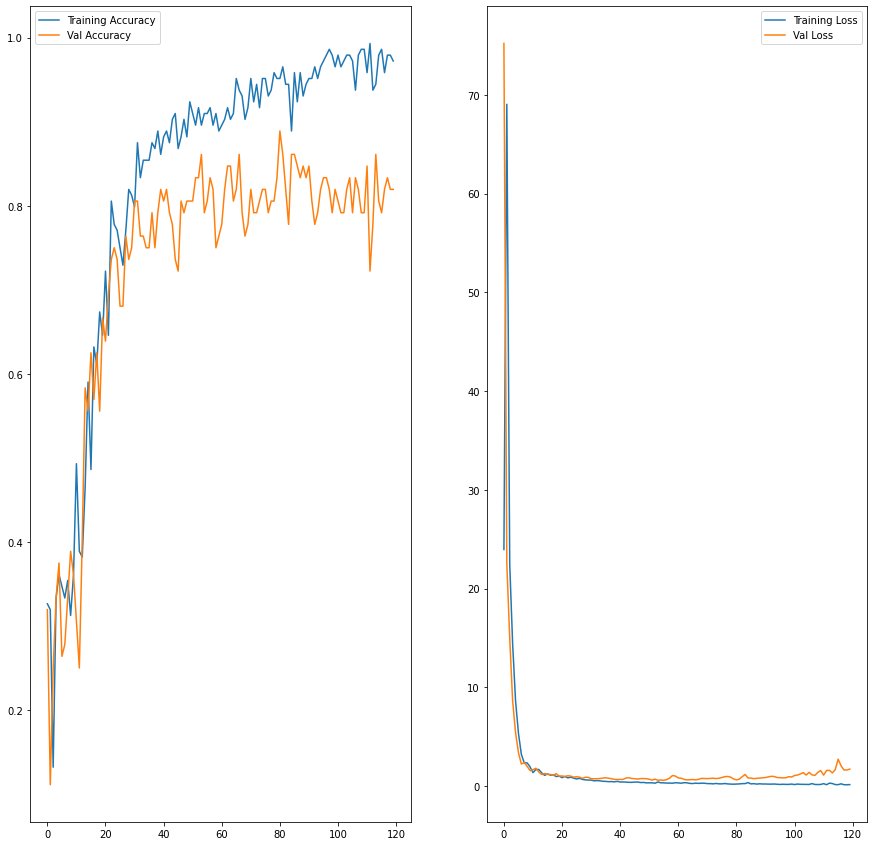

In [36]:
figure=plt.figure(figsize=(15,15))
ax=figure.add_subplot(121)
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Training Accuracy','Val Accuracy'])
bx=figure.add_subplot(122)
bx.plot(history.history['loss'])
bx.plot(history.history['val_loss'])
bx.legend(['Training Loss','Val Loss'])

In [37]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 37ms/step - loss: 0.6664 - accuracy: 0.9167


[0.6663768291473389, 0.9166666865348816]

In [45]:
# create train features
test_features = []
test_labels = []

for filename in os.listdir(TEST_DIR):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(TEST_DIR, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ary=Image.fromarray(img, 'RGB')
        r=ary.resize((50,50))
        test_labels.append(filename.split('_')[0])
        test_features.append(np.array(r))

In [48]:
test_features = np.array(test_features)
np.save("test_features", test_features)
t_image = np.load("test_features.npy", allow_pickle=True)

In [50]:
pred = np.argmax(model.predict(t_image), axis=1)

In [ ]:
pred = np.argmax(model.predict(t_image), axis=1)
predictions = la.inverse_transform(pred)

In [83]:
pred

array([1, 0, 3, 3, 1, 3, 0, 0, 0, 1, 0, 3, 3, 0, 1, 0, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 3, 0, 1, 1, 1, 3, 3, 3, 3, 0,
       3, 3, 1, 3, 0, 1, 3, 0, 3, 3, 0, 1, 1, 0, 1, 0])

In [ ]:
def predict_fruit(index):
    t_image = np.expand_dims(test_features[index],axis=0)
    pred_t = np.argmax(model.predict(t_image), axis=1)
    prediction_t = la.inverse_transform(pred_t)
    print(prediction_t[0])
    plt.imshow(test_features[index])

In [88]:
train_labels_encoded

array([3, 1, 1, 3, 0, 1, 1, 0, 1, 1, 1, 3, 3, 3, 3, 1, 3, 2, 1, 1, 1, 0,
       1, 0, 3, 3, 1, 1, 0, 2, 1, 1, 1, 2, 0, 3, 0, 3, 2, 3, 1, 0, 0, 1,
       0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 2, 3, 3, 0, 0, 3, 1, 3, 2, 3, 1, 0,
       0, 1, 0, 3, 1, 3, 1, 0, 3, 0, 3, 0, 0, 1, 3, 0, 3, 1, 0, 2, 0, 3,
       0, 1, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 3, 0, 2, 3, 1, 0, 0,
       0, 1, 3, 3, 3, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 3, 3, 0, 0, 3,
       2, 1, 0, 0, 3, 3, 1, 3, 0, 1, 1, 0, 3, 1, 1, 1, 0, 3, 0, 1, 0, 0,
       3, 1, 1, 0, 1, 1, 0, 3, 0, 3, 1, 3, 0, 3, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 2, 0, 3, 0, 1, 3, 2, 1, 3, 1, 2, 1, 0, 3, 3, 2, 0, 1, 3, 1, 1,
       0, 1, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 0, 1, 3, 3, 3, 1, 3, 3, 3, 2,
       3, 3, 1, 0, 1, 1, 2, 3, 3, 3, 1, 1, 3, 3, 0, 1, 3, 1, 3, 3])

orange


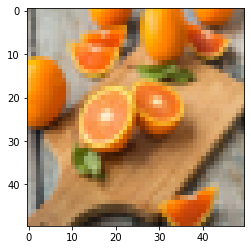

In [ ]:
predict_fruit(10)

orange


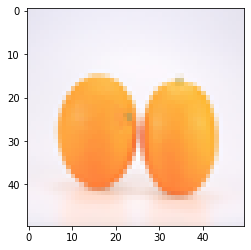

In [ ]:
predict_fruit(20)

banana


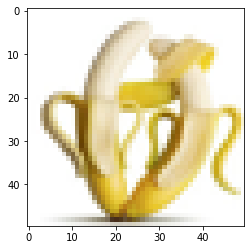

In [ ]:
predict_fruit(56)

banana


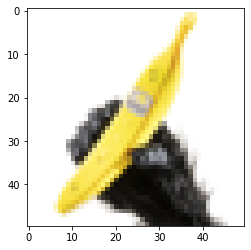

In [ ]:
predict_fruit(5)